# Women-coders experience by countries 
The analysis includes several parts related to evaluation of women-coders experience by countries:
1. Woman-coders share at the working place in top 10 countries in 2019 and 2020
2. Average working hours time per week in top 10 countries  in 2019 and 2020
3. Average years of experience in top 10 countries  in 2019 and 2020
Stack overflow surveys 2019 and 2020 were used as basis for analysis. For more info please refer to https://insights.stackoverflow.com/survey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring available parameters and preparing data for analysis

In [2]:
df_SD2019 = pd.read_csv('./survey_results_public_2019.csv', low_memory=False) #used low_memory to fix possible issue with mix data columns, available data not that big; otherwise, define dtype manually (dtype={'column':dtype})
df_SD2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df_SD2020 = pd.read_csv('./survey_results_public_2020.csv', low_memory=False) #used low_memory to fix possible issue with mix data columns, available data not that big; otherwise, define dtype manually (dtype={'column':dtype})
df_SD2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Data bases were joined and cut to parameters for analysis

In [4]:
df_SD2020A = df_SD2020[['Country', 'Gender','WorkWeekHrs', 'YearsCode']]
df_SD2020A['SurveyYear'] = 2020
df_SD2019A = df_SD2019[['Country', 'Gender','WorkWeekHrs', 'YearsCode']]
df_SD2019A['SurveyYear'] = 2019

<ipython-input-4-4eb86910e56f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SD2020A['SurveyYear'] = 2020
<ipython-input-4-4eb86910e56f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SD2019A['SurveyYear'] = 2019


In [5]:
df_SD20192020A = pd.concat([df_SD2019A,df_SD2020A])
df_SD20192020A

,Country,Gender,WorkWeekHrs,YearsCode,SurveyYear
0,United Kingdom,Man,NaN,4,2019
1,Bosnia and Herzegovina,Man,NaN,NaN,2019
2,Thailand,Man,40.0,3,2019
3,United States,Man,80.0,3,2019
4,Ukraine,Man,55.0,16,2019
...,...,...,...,...,...
64456,United States,NaN,NaN,10,2020
64457,Morocco,NaN,NaN,NaN,2020
64458,Viet Nam,NaN,NaN,NaN,2020
64459,Poland,NaN,NaN,NaN,2020


Data base was split by man and women by countries and survey years

In [6]:
Man_by_countries = df_SD20192020A[df_SD20192020A['Gender'] == 'Man']
Man_by_countries_count = Man_by_countries[['Country','WorkWeekHrs', 'YearsCode','SurveyYear','Gender']].groupby(['Country','WorkWeekHrs', 'YearsCode','SurveyYear']).count()
Man_by_countries_count.reset_index(inplace=True)
Man_by_countries_count.set_index('Country', inplace=True)
Man_by_countries_count

,WorkWeekHrs,YearsCode,SurveyYear,Gender
Country,,,,
Afghanistan,8.0,5,2020,1
Afghanistan,28.0,5,2020,1
Afghanistan,30.0,7,2019,1
Afghanistan,35.0,3,2020,1
Afghanistan,36.0,10,2019,1
...,...,...,...,...
Zimbabwe,60.0,14,2019,1
Zimbabwe,60.0,3,2019,1
Zimbabwe,70.0,3,2019,1


In [11]:
Woman_by_countries = df_SD20192020A[df_SD20192020A['Gender'] == 'Woman']
Woman_by_countries_count = Woman_by_countries[['Country','WorkWeekHrs', 'YearsCode','SurveyYear','Gender']].groupby(['Country','WorkWeekHrs', 'YearsCode','SurveyYear']).count()
Woman_by_countries_count.reset_index(inplace=True)
Woman_by_countries_count.set_index('Country', inplace=True)
Woman_by_countries_count.head(30)

,WorkWeekHrs,YearsCode,SurveyYear,Gender
Country,,,,
Afghanistan,33.0,10,2019,1
Afghanistan,48.0,5,2020,1
Afghanistan,168.0,10,2019,1
Albania,35.0,6,2019,1
Albania,40.0,3,2019,1
Albania,40.0,6,2019,1
Albania,42.0,4,2019,1
Albania,50.0,5,2019,3
Albania,65.0,2,2019,1


Data base with man & woman by countries and years for comparison was created

In [12]:
Man_by_countries_count = Man_by_countries[['Country','SurveyYear','Gender']].groupby(['Country','SurveyYear']).count()
Man_by_countries_count.reset_index(inplace=True)
Man_by_countries_count.set_index('Country', inplace=True)
Man_by_countries_count
Woman_by_countries_count = Woman_by_countries[['Country','SurveyYear','Gender']].groupby(['Country','SurveyYear']).count()
Woman_by_countries_count.reset_index(inplace=True)
Woman_by_countries_count.set_index('Country', inplace=True)
Woman_by_countries_count
Man_and_Woman = Man_by_countries_count.join(Woman_by_countries_count,on = ['Country'], how='left', lsuffix='_Man', rsuffix='_Woman').dropna()
Man_and_Woman['Total'] = Man_and_Woman[['Gender_Man','Gender_Woman']].sum(axis=1)
Man_and_Woman

,SurveyYear_Man,Gender_Man,SurveyYear_Woman,Gender_Woman,Total
Country,,,,,
Afghanistan,2019,26,2019.0,2.0,28.0
Afghanistan,2019,26,2020.0,4.0,30.0
Afghanistan,2020,28,2019.0,2.0,30.0
Afghanistan,2020,28,2020.0,4.0,32.0
Albania,2019,70,2019.0,12.0,82.0
...,...,...,...,...,...
Viet Nam,2020,202,2020.0,6.0,208.0
Zambia,2019,11,2019.0,1.0,12.0
Zambia,2020,13,2019.0,1.0,14.0


## Research question 1 answer: Woman-coders share at the working place in top 10 countries in 2019 and 2020

<ipython-input-48-2c705f3a7a2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Man_and_Woman2020['Woman_in_coding'] = Man_and_Woman2020['Gender_Woman']/Man_and_Woman2020['Total']
<ipython-input-48-2c705f3a7a2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Man_and_Woman2020.sort_values('Woman_in_coding',ascending=False,inplace=True)


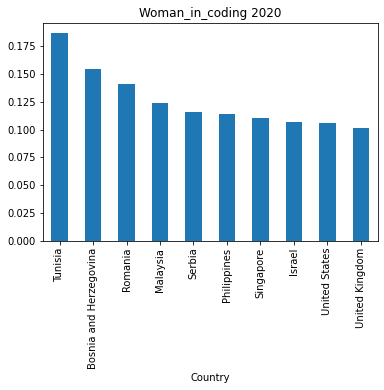

In [48]:
Man_and_Woman2020 = Man_and_Woman[(Man_and_Woman['SurveyYear_Man'] == 2020) & 
                                  (Man_and_Woman['SurveyYear_Woman'] == 2020) &
                                  (Man_and_Woman['Total'] > 50) ]
Man_and_Woman2020['Woman_in_coding'] = Man_and_Woman2020['Gender_Woman']/Man_and_Woman2020['Total']
Man_and_Woman2020.sort_values('Woman_in_coding',ascending=False,inplace=True)
Man_and_Woman2020['Woman_in_coding'].head(10).plot(kind='bar', legend=None)
plt.title('Woman_in_coding 2020')
plt.show()

<ipython-input-47-6c9a933aec8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Man_and_Woman2019['Woman_in_coding'] = Man_and_Woman2019['Gender_Woman']/Man_and_Woman2020['Total']
<ipython-input-47-6c9a933aec8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Man_and_Woman2019.sort_values('Woman_in_coding',ascending=False,inplace=True)


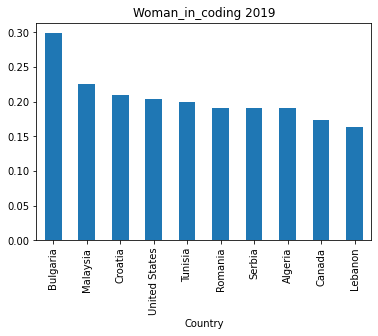

In [47]:
Man_and_Woman2019 = Man_and_Woman[(Man_and_Woman['SurveyYear_Man'] == 2019) & 
                                  (Man_and_Woman['SurveyYear_Woman'] == 2019) &
                                  (Man_and_Woman['Total'] > 50) ]
Man_and_Woman2019['Woman_in_coding'] = Man_and_Woman2019['Gender_Woman']/Man_and_Woman2020['Total']
Man_and_Woman2019.sort_values('Woman_in_coding',ascending=False,inplace=True)
Man_and_Woman2019['Woman_in_coding'].head(10).plot(kind='bar', legend=None)
plt.title('Woman_in_coding 2019')
plt.show()

In [45]:
Man_and_Woman2020.sort_values(by='Gender_Woman', ascending=False).head(10)

,SurveyYear_Man,Gender_Man,SurveyYear_Woman,Gender_Woman,Total,Woman_in_coding
Country,,,,,,
United States,2020,9176,2020.0,1086.0,10262.0,0.105827
India,2020,5002,2020.0,370.0,5372.0,0.068876
United Kingdom,2020,2900,2020.0,326.0,3226.0,0.101054
Germany,2020,3107,2020.0,190.0,3297.0,0.057628
Canada,2020,1614,2020.0,176.0,1790.0,0.098324
France,2020,1421,2020.0,106.0,1527.0,0.069417
Australia,2020,914,2020.0,91.0,1005.0,0.090547
Netherlands,2020,1036,2020.0,86.0,1122.0,0.076649
Brazil,2020,1362,2020.0,77.0,1439.0,0.053509


In [46]:
Man_and_Woman2019.sort_values(by='Gender_Woman', ascending=False).head(10)

,SurveyYear_Man,Gender_Man,SurveyYear_Woman,Gender_Woman,Total,Woman_in_coding
Country,,,,,,
United States,2019,17700,2019.0,2092.0,19792.0,0.203859
India,2019,7802,2019.0,570.0,8372.0,0.106106
United Kingdom,2019,5060,2019.0,426.0,5486.0,0.132052
Canada,2019,2916,2019.0,311.0,3227.0,0.173743
Germany,2019,5289,2019.0,296.0,5585.0,0.089779
France,2019,2180,2019.0,114.0,2294.0,0.074656
Australia,2019,1684,2019.0,111.0,1795.0,0.110448
Netherlands,2019,1676,2019.0,108.0,1784.0,0.096257
Poland,2019,1757,2019.0,108.0,1865.0,0.100279


# # Research question 2 and 3 answers: Average working hours time per week and Average years of experience in top 10 countries  in 2019 and 2020

In [17]:
Woman_by_countries2019 = df_SD20192020A[(df_SD20192020A['Gender'] == 'Woman')& 
                                        (df_SD20192020A['SurveyYear'] == 2019)
                                       ]

for index in Woman_by_countries2019.index:
    if Woman_by_countries2019.loc[index,'YearsCode']== 'Less than 1 year':
        Woman_by_countries2019.loc[index,'YearsCode'] = 0.0
    elif Woman_by_countries2019.loc[index,'YearsCode']== 'More than 50 years':
        Woman_by_countries2019.loc[index,'YearsCode'] = 50
    else:
        pass

for index in Woman_by_countries2019.index:
    if Woman_by_countries2019.loc[index,'WorkWeekHrs']> 120:
        Woman_by_countries2019.loc[index,'WorkWeekHrs'] = 40
    else:
        pass
     
Woman_by_countries2019.dropna(subset =['WorkWeekHrs','YearsCode'],inplace=True)
Woman_by_countries2019['YearsCode'] = pd.to_numeric(Woman_by_countries2019['YearsCode'])
Woman_by_countries2019

C:\Users\vadim\AppData\Local\Programs\Python\Python39\Scripts\venv\Lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-17-4f1852daea47>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Woman_by_countries2019.dropna(subset =['WorkWeekHrs','YearsCode'],inplace=True)
<ipython-input-17-4f1852daea47>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Country,Gender,WorkWeekHrs,YearsCode,SurveyYear
34,United States,Woman,40.0,14.0,2019
70,Philippines,Woman,8.0,4.0,2019
74,India,Woman,50.0,7.0,2019
85,China,Woman,50.0,6.0,2019
99,Canada,Woman,35.0,33.0,2019
...,...,...,...,...,...
88171,Germany,Woman,40.0,8.0,2019
88177,United States,Woman,37.0,3.0,2019
88183,United States,Woman,40.0,13.0,2019
88192,United States,Woman,40.0,11.0,2019


In [34]:
options = Woman_by_countries2019.value_counts(subset=['Country'])
options = options.reset_index()
options = options.rename(columns={0:'Counter'})
options = options[options['Counter']>50]
options_L = options['Country'].to_list()
Woman_by_countries2019_SS = Woman_by_countries2019[Woman_by_countries2019['Country'].isin(options_L)]
Woman_by_countries2019_SS

,Country,Gender,WorkWeekHrs,YearsCode,SurveyYear
34,United States,Woman,40.0,14.0,2019
74,India,Woman,50.0,7.0,2019
99,Canada,Woman,35.0,33.0,2019
104,United States,Woman,40.0,9.0,2019
140,United States,Woman,40.0,8.0,2019
...,...,...,...,...,...
88171,Germany,Woman,40.0,8.0,2019
88177,United States,Woman,37.0,3.0,2019
88183,United States,Woman,40.0,13.0,2019
88192,United States,Woman,40.0,11.0,2019


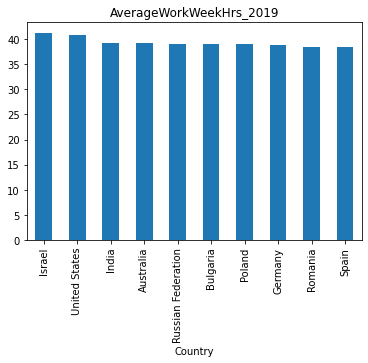

In [35]:
AverageWH_CY2019_SS = Woman_by_countries2019_SS.groupby('Country').mean()
AverageWH_CY2019_SS.sort_values('WorkWeekHrs',ascending=False,inplace=True)
AverageWH_CY2019_SS['WorkWeekHrs'].head(10).plot(kind='bar', legend=None)
plt.title('AverageWorkWeekHrs_2019')
plt.show()

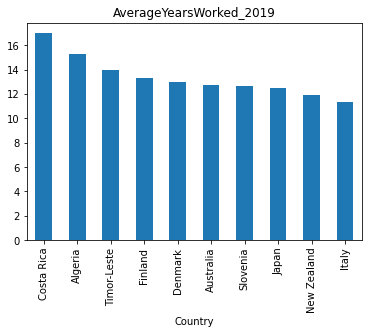

In [36]:
AverageYC_CY2019_SS = Woman_by_countries2019.groupby('Country').mean()
AverageYC_CY2019_SS.sort_values('YearsCode',ascending=False,inplace=True)
AverageYC_CY2019_SS['YearsCode'].head(10).plot(kind='bar', legend=None)
plt.title('AverageYearsWorked_2019')
plt.show()

In [37]:
Woman_by_countries2020 = df_SD20192020A[(df_SD20192020A['Gender'] == 'Woman')& 
                                        (df_SD20192020A['SurveyYear'] == 2020)
                                       ]

for index in Woman_by_countries2020.index:
    if Woman_by_countries2020.loc[index,'YearsCode']== 'Less than 1 year':
        Woman_by_countries2020.loc[index,'YearsCode'] = 0.0
    elif Woman_by_countries2020.loc[index,'YearsCode']== 'More than 50 years':
        Woman_by_countries2020.loc[index,'YearsCode'] = 50
    else:
        pass

for index in Woman_by_countries2020.index:
    if Woman_by_countries2020.loc[index,'WorkWeekHrs']> 120:
        Woman_by_countries2020.loc[index,'WorkWeekHrs'] = 40
    else:
        pass
     
Woman_by_countries2020.dropna(subset =['WorkWeekHrs','YearsCode'],inplace=True)
Woman_by_countries2020['YearsCode'] = pd.to_numeric(Woman_by_countries2020['YearsCode'])
Woman_by_countries2020

C:\Users\vadim\AppData\Local\Programs\Python\Python39\Scripts\venv\Lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-37-f53502e81c01>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Woman_by_countries2020.dropna(subset =['WorkWeekHrs','YearsCode'],inplace=True)
<ipython-input-37-f53502e81c01>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Country,Gender,WorkWeekHrs,YearsCode,SurveyYear
55,United States,Woman,40.0,6.0,2020
84,United States,Woman,24.0,6.0,2020
88,United States,Woman,45.0,6.0,2020
95,Canada,Woman,35.0,17.0,2020
99,United States,Woman,40.0,30.0,2020
...,...,...,...,...,...
61641,United States,Woman,35.0,13.0,2020
61663,United States,Woman,40.0,0.0,2020
61765,United Kingdom,Woman,45.0,15.0,2020
61949,United States,Woman,40.0,4.0,2020


In [38]:
options = Woman_by_countries2020.value_counts(subset=['Country'])
options = options.reset_index()
options = options.rename(columns={0:'Counter'})
options = options[options['Counter']>50]
options_L = options['Country'].to_list()
Woman_by_countries2020_SS = Woman_by_countries2020[Woman_by_countries2020['Country'].isin(options_L)]
Woman_by_countries2020_SS

,Country,Gender,WorkWeekHrs,YearsCode,SurveyYear
55,United States,Woman,40.0,6.0,2020
84,United States,Woman,24.0,6.0,2020
88,United States,Woman,45.0,6.0,2020
95,Canada,Woman,35.0,17.0,2020
99,United States,Woman,40.0,30.0,2020
...,...,...,...,...,...
61641,United States,Woman,35.0,13.0,2020
61663,United States,Woman,40.0,0.0,2020
61765,United Kingdom,Woman,45.0,15.0,2020
61949,United States,Woman,40.0,4.0,2020


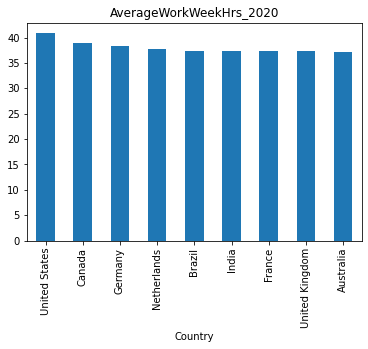

In [39]:
AverageWH_CY2020_SS = Woman_by_countries2020_SS.groupby('Country').mean()
AverageWH_CY2020_SS.sort_values('WorkWeekHrs',ascending=False,inplace=True)
AverageWH_CY2020_SS['WorkWeekHrs'].head(10).plot(kind='bar', legend=None)
plt.title('AverageWorkWeekHrs_2020')
plt.show()

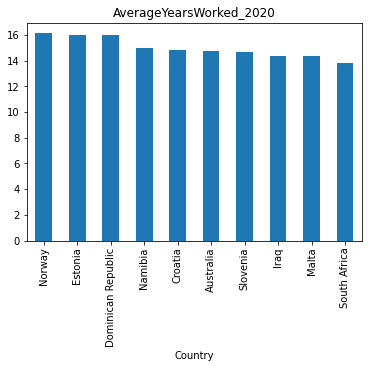

In [40]:
AverageYC_CY2020_SS = Woman_by_countries2020.groupby('Country').mean()
AverageYC_CY2020_SS.sort_values('YearsCode',ascending=False,inplace=True)
AverageYC_CY2020_SS['YearsCode'].head(10).plot(kind='bar', legend=None)
plt.title('AverageYearsWorked_2020')
plt.show()